# A practice on ML learning of 1D Schordinger equation

This idea is to perform machine learning on the 1D Schordinger equation 

\begin{equation}
\bigg[-\frac{h^2}{2m} \Delta^2 + V(r)\bigg] \Psi(r) = E\Psi(r)
\end{equation}

Suppose we already have a bunch of data regarding {V, E, $\Psi$(r)} from numerical solutions. We want to test if we can develop a robust model to predict the ground state energy `E` purely from the `V`, without knowing anything about $\Psi$.

## Flowchart
- Load the data from numercial solutions, here we provide two dataset `training` and `test` from two independent calculations
- Fit the model with neural network regreesor 

In [1]:
from IPython.display import HTML
HTML('<img src="out.gif">')

In [2]:
%matplotlib inline

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from monty.serialization import loadfn, MontyDecoder,MontyEncoder

# load the data
X, y, z = [], [], []
json_data = loadfn('trainingdata.json', cls=MontyDecoder)
for dct in json_data:
    X.append(dct['potential'][:,1])
    y.append(dct['eigenvalue'][1])
    z.append(dct['wavefunction'])
    
X1, y1, z1 = [], [], []
json_data1 = loadfn('testdata.json', cls=MontyDecoder)
for dct in json_data1:
    X1.append(dct['potential'][:,1])
    y1.append(dct['eigenvalue'][1])
    z1.append(dct['wavefunction'])

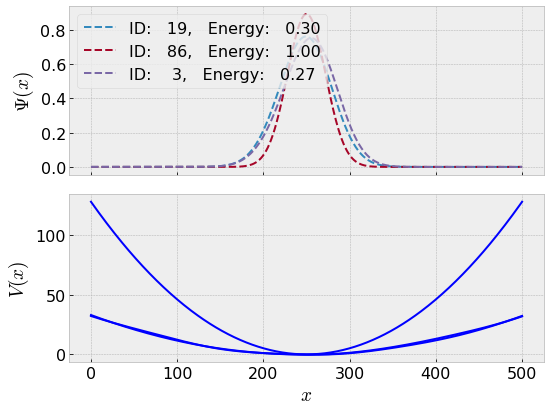

In [4]:
# Randomly choose and plot the wavefunction & potential

from random import choices
import matplotlib.pyplot as plt
plt.style.use("bmh")
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('font', size=16)
matplotlib.rc('axes', titlesize=16)

fig = plt.gcf()
fig.set_size_inches(8, 6)

ax1 = plt.subplot(211)
ids = choices(range(len(X1)), k=3)
for i in ids:
    data = json_data[i]
    eig_str = "ID: {:4d},   Energy: {:6.2f}".format(i, y[i])
    ax1.plot(z[i], '--', label=eig_str)
ax1.set_ylabel('$\Psi(x)$')
ax1.legend(loc=2)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(212, sharex=ax1)
for i in ids:
    ax2.plot(X[i], 'b-')
ax2.set_ylabel('$V(x)$')
ax2.set_xlabel('$x$')
#ax2.set_ylim([0, 2*max(eigs)])
plt.tight_layout()
plt.show()

In [5]:
# Processing the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)  
X_0 = scaler.transform(X)  
X1_0 = scaler.transform(X1)  

In [6]:
# Fitting
clf = MLPRegressor(hidden_layer_sizes=(60,3), max_iter=1500, random_state=1)
clf.fit(X_0, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
# Examing the performance
r2_train = 'r2: {:.4f}'.format(r2_score(y, clf.predict(X_0)))
r2_test = 'r2: {:.4f}'.format(r2_score(y1, clf.predict(X1_0)))
mae_train = 'mae: {:8.4f}'.format(mean_absolute_error(y, clf.predict(X_0)))
mae_test = 'mae: {:8.4f}'.format(mean_absolute_error(y1, clf.predict(X1_0)))
print('Training     ', r2_train, mae_train)
print('Test         ', r2_test, mae_test)

Training      r2: 0.9809 mae:   1.0958
Test          r2: 0.9608 mae:   0.5938


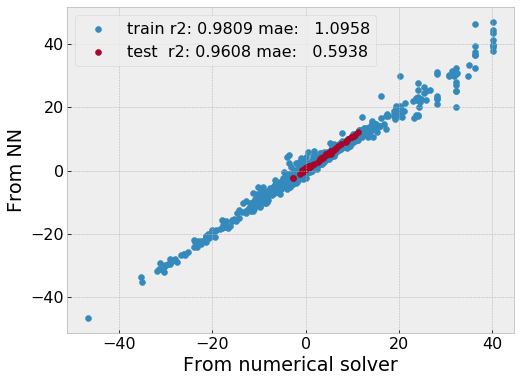

In [8]:
# Scatter plot
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.scatter(y, clf.predict(X_0), label='train ' + r2_train + ' ' + mae_train)
plt.scatter(y1, clf.predict(X1_0), label='test  ' + r2_test + ' ' + mae_test)
plt.xlabel('From numerical solver')
plt.ylabel('From NN')
plt.legend()
plt.show()